# Análisis Exploratorio de Datos
Vamos a realizar los siguientes analisis:

 - Estadísticas descriptivas y distribución de puntajes.

 - Distribución porcentual de variables categóricas.

Estadísticas descriptivas y distribución de puntajes


Obejtivo:


Analizar la tendencia central y la dispersion de los puntajes. Visualizacion mediante histogramas para detectar la posible presencia de algunos en los datos.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('../data/interim/2022_Censo_Estudiantes.csv',sep=',', decimal=".")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403468 entries, 0 to 403467
Columns: 232 entries, c_jurisdiccion to jurisdiccion
dtypes: float64(4), int64(4), object(224)
memory usage: 714.1+ MB


In [20]:
df.head(5)

,c_jurisdiccion,ID1,idseccion,idalumno,sector,ambito,ap01,ap02,ap03,ap04,...,NSE_puntaje,NSE_nivel,edadA_junio2022,migracion,sobreedad,Nivel_Ed_Madre,Nivel_Ed_Padre,Nivel_Ed_Persona_Resp,region,jurisdiccion
0,90,36008003600800,1,655437,Estatal,Urbano,NaN,NaN,NaN,NaN,...,-0.372449,Medio,NaN,NaN,NaN,Primaria incompleta,NaN,,NOA,Tucumán
1,90,36008003600800,1,655438,Estatal,Urbano,NaN,NaN,NaN,NaN,...,-0.716539,Bajo,NaN,NaN,NaN,Primaria incompleta,NaN,,NOA,Tucumán
2,90,36008003600800,1,655439,Estatal,Urbano,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Secundaria incompleta,NaN,,NOA,Tucumán
3,90,36008003600800,1,655440,Estatal,Urbano,NaN,NaN,NaN,NaN,...,0.122361,Medio,NaN,NaN,NaN,Primaria incompleta,NaN,,NOA,Tucumán
4,90,36008003600800,1,655441,Estatal,Urbano,NaN,NaN,NaN,NaN,...,-0.654602,Bajo,NaN,NaN,NaN,No fue a la escuela,NaN,,NOA,Tucumán


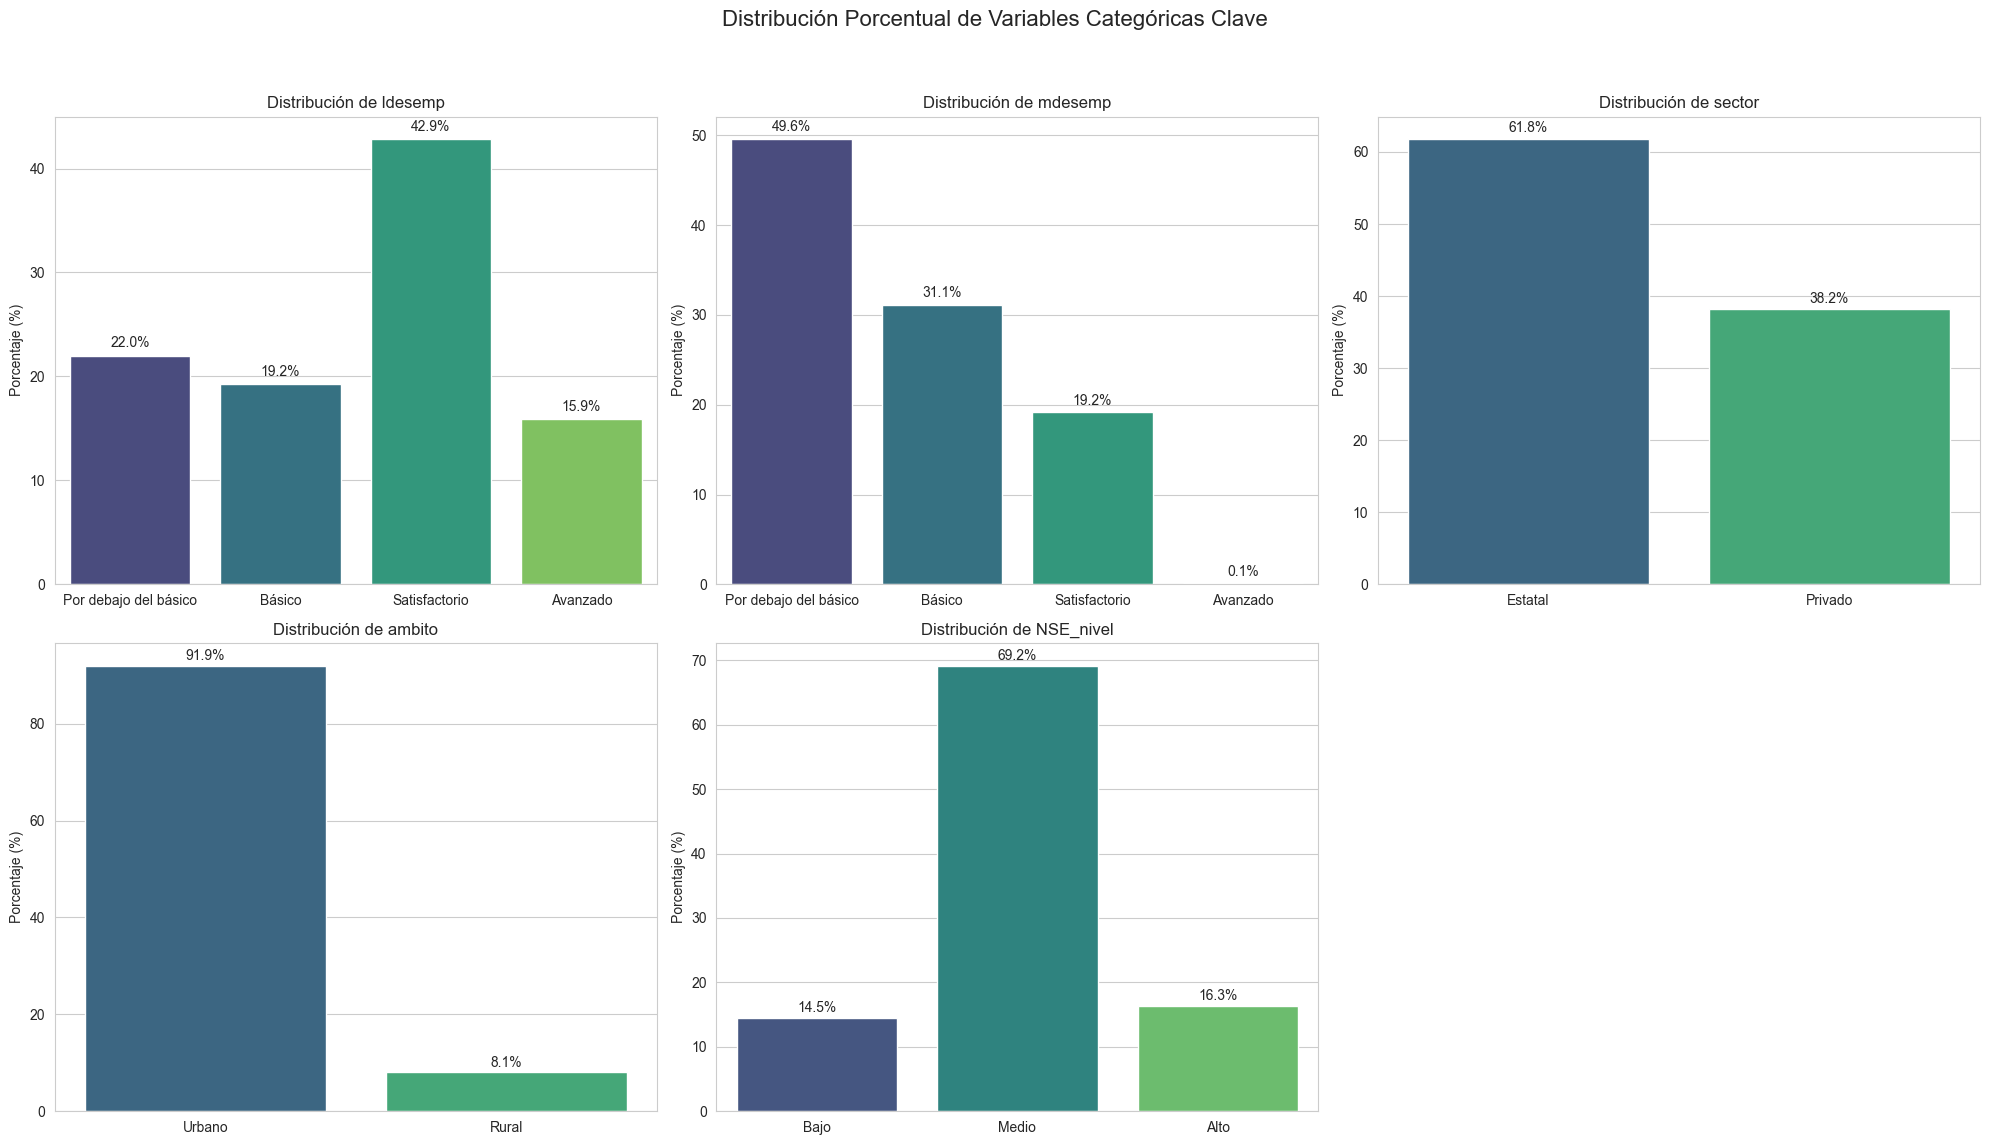

In [ ]:
vars_categoricas_eda = ['ldesemp', 'mdesemp', 'sector', 'ambito', 'NSE_nivel']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten() 
fig.suptitle('Distribución Porcentual de Variables Categóricas Clave', fontsize=16)

for i, col in enumerate(vars_categoricas_eda):
    
    temp_data = df[col].astype(str).dropna()
    
    plot_data = temp_data[temp_data != 'nan'].value_counts(normalize=True).mul(100)

    if col in ['ldesemp', 'mdesemp']:
        orden_desemp = ['Por debajo del básico', 'Básico', 'Satisfactorio', 'Avanzado']
        plot_data = plot_data.reindex(orden_desemp)
    elif col == 'NSE_nivel':
        orden_nse = ['Bajo', 'Medio', 'Alto']
        plot_data = plot_data.reindex(orden_nse)

    sns.barplot(x=plot_data.index, y=plot_data.values, ax=axes[i], palette="viridis", hue=plot_data.index, legend=False)
    
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_ylabel('Porcentaje (%)')
    axes[i].set_xlabel(None)
    
    for bar in axes[i].patches:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2., 
                    height + 0.5, 
                    f'{height:.1f}%', 
                    ha='center', 
                    va='bottom')

fig.delaxes(axes[5])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Estadísticas descriptivas de puntajes (ignorando NaN)
            lpuntaje       mpuntaje    NSE_puntaje
count  391291.000000  386779.000000  349871.000000
mean      515.163826     474.615813       0.282872
std       115.211869      68.370188       0.674014
min       160.253110     292.031340      -2.116088
25%       429.515135     423.734800      -0.101794
50%       512.628540     466.085660       0.395518
75%       599.367920     519.790495       0.781679
max       822.416380     691.073300       2.677012


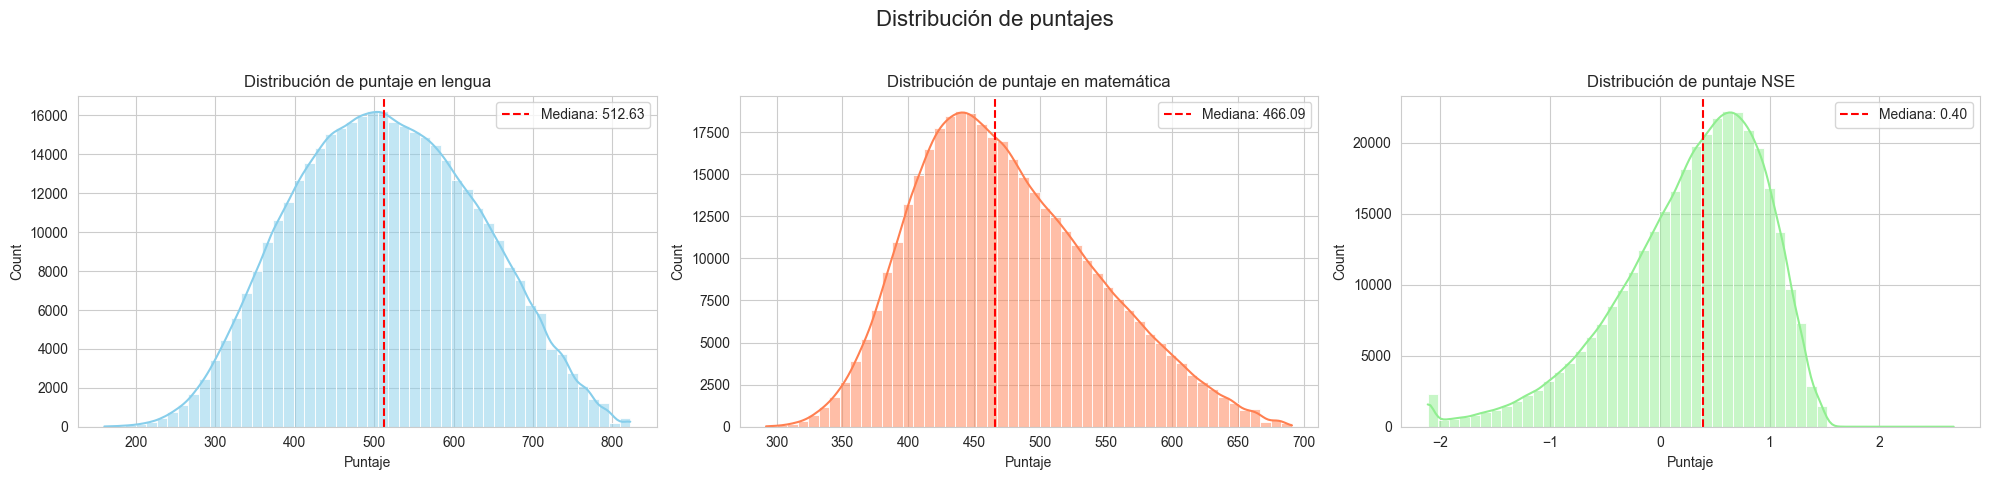

In [22]:
# Configuración de los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

# Estadísticas descriptivas 
print("Estadísticas descriptivas de puntajes (ignorando NaN)")
print(df[['lpuntaje', 'mpuntaje', 'NSE_puntaje']].describe())

# Visualización de distribuciones
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Distribución de puntajes', fontsize=16)

# Histograma de puntaje de lengua
sns.histplot(df['lpuntaje'].dropna(), kde=True, ax=axes[0], color='skyblue', bins=50)
axes[0].set_title('Distribución de puntaje en lengua')
axes[0].set_xlabel('Puntaje')
axes[0].axvline(df['lpuntaje'].median(), color='red', linestyle='--', label=f'Mediana: {df["lpuntaje"].median():.2f}')
axes[0].legend()

# Histograma de puntaje de matemática
sns.histplot(df['mpuntaje'].dropna(), kde=True, ax=axes[1], color='coral', bins=50)
axes[1].set_title('Distribución de puntaje en matemática')
axes[1].set_xlabel('Puntaje')
axes[1].axvline(df['mpuntaje'].median(), color='red', linestyle='--', label=f'Mediana: {df["mpuntaje"].median():.2f}')
axes[1].legend()

# Histograma de puntaje NSE
sns.histplot(df['NSE_puntaje'].dropna(), kde=True, ax=axes[2], color='lightgreen', bins=50)
axes[2].set_title('Distribución de puntaje NSE')
axes[2].set_xlabel('Puntaje')
axes[2].axvline(df['NSE_puntaje'].median(), color='red', linestyle='--', label=f'Mediana: {df["NSE_puntaje"].median():.2f}')
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Analisis bivariado categórico vs. numerico


El objetivo de esta fase es visualizar como las variables categóricas de contexto, como 'ambito', 'sector' y 'NSE', se relacionan con las medias de puntajes (lpuntaje, mpuntaje). Usaremos gráficos de caja, para que de esta forma poder observar la media, mediana, la dispersión y los valores atípicos para cada grupo.

# Rendimiento por Contexto


Objetivo:

Detectar visualmente las diferencia en cuanto al rendimiento. Por ejemplo, si el puntaje promedio del sector privado es significativamente mas alto que el del sector estatal, o si existe una notable diferencia entre los niveles NSE.

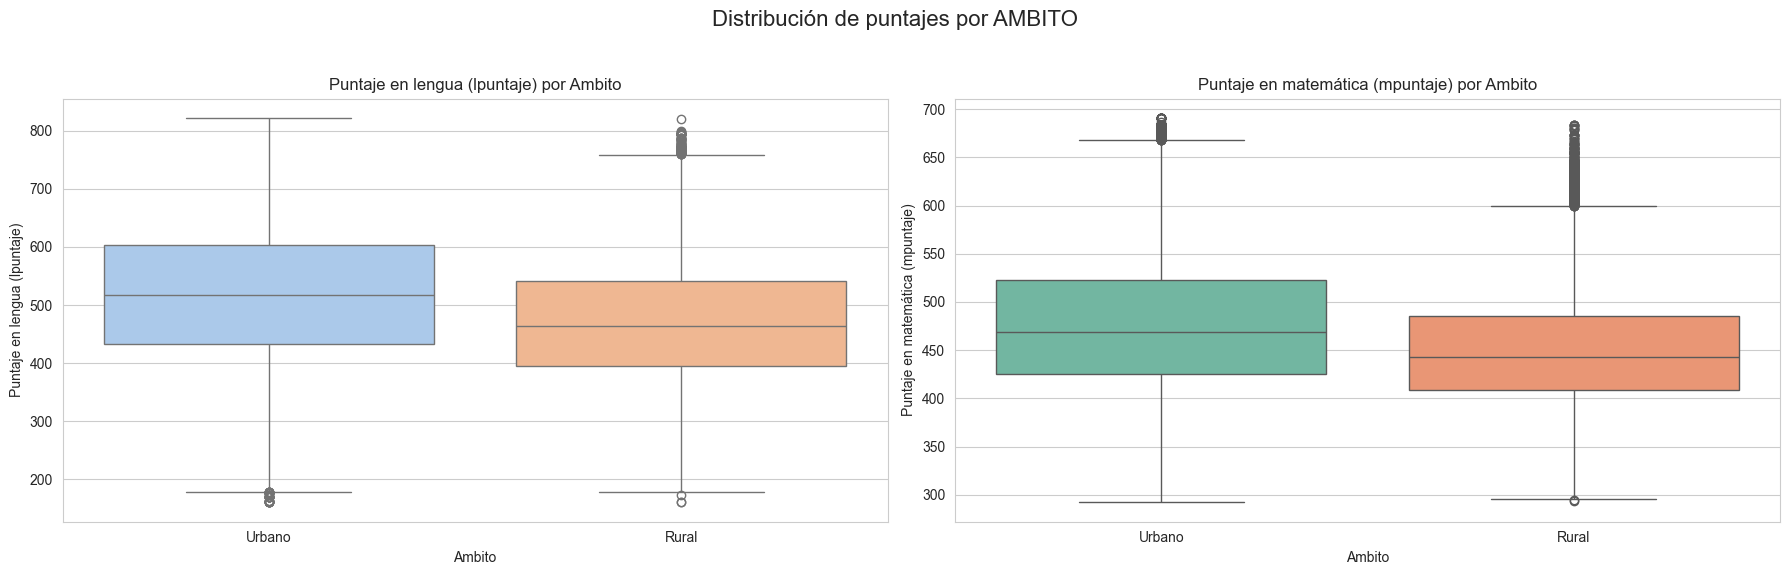

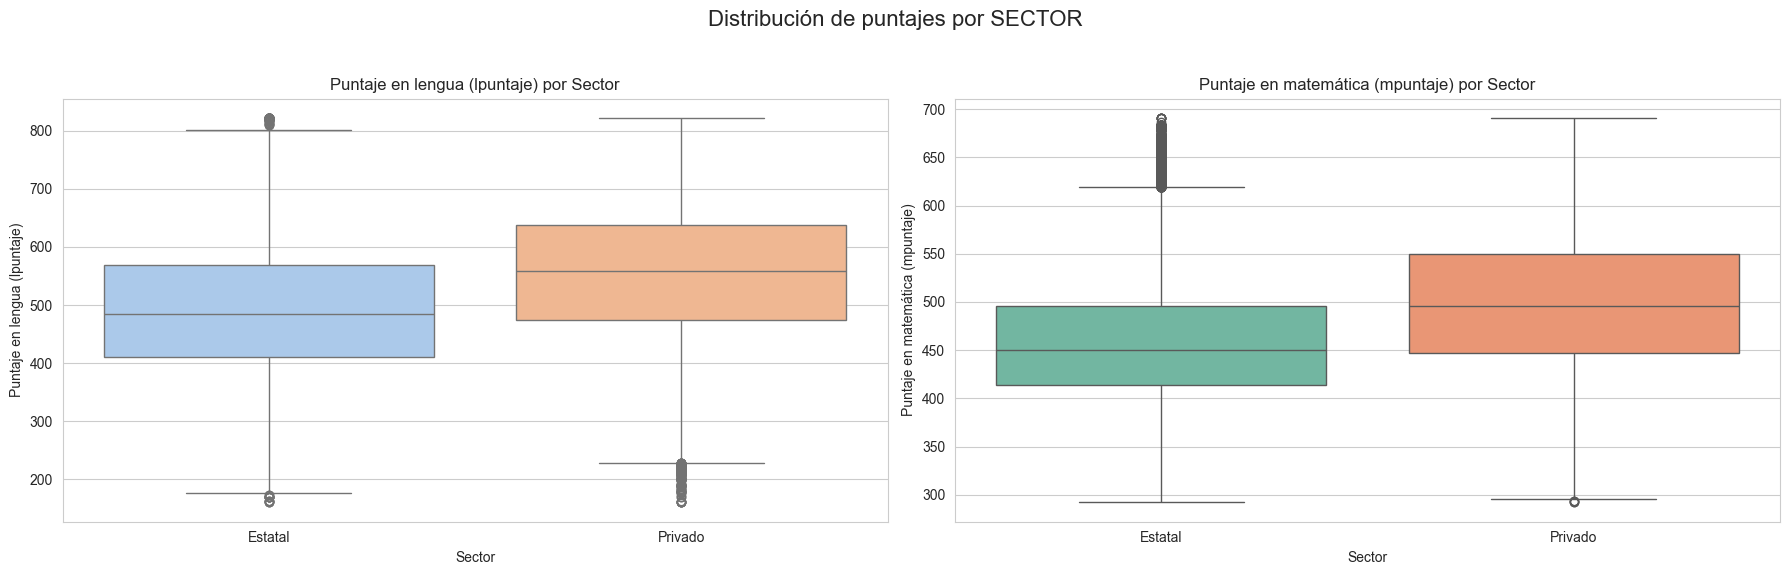

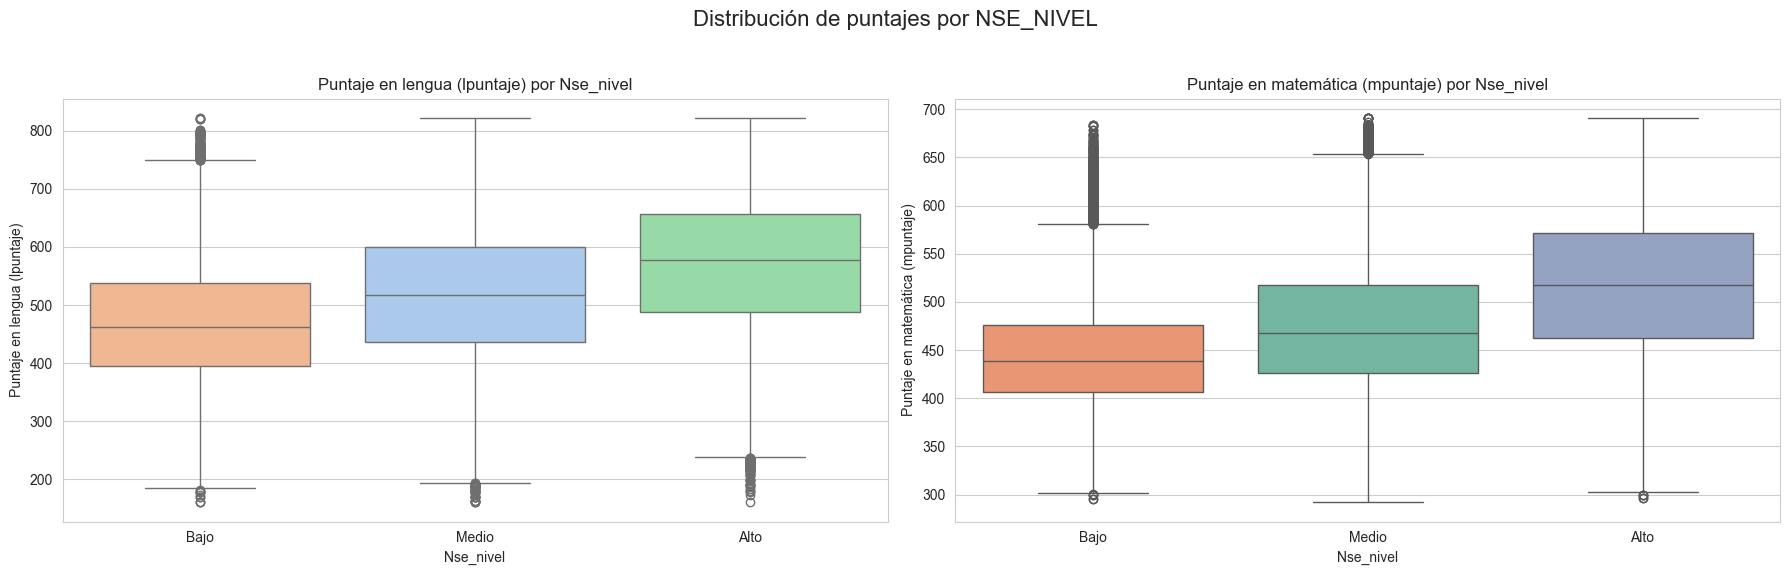

In [24]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

variables_contexto = ['ambito', 'sector', 'NSE_nivel']
puntajes = ['lpuntaje', 'mpuntaje']

for contexto in variables_contexto:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f'Distribución de puntajes por {contexto.upper()}', fontsize=16)

    orden_contexto = None
    if contexto == 'NSE_nivel':
        orden_contexto = ['Bajo', 'Medio', 'Alto']
    
    sns.boxplot(x=contexto, y='lpuntaje', data=df, order=orden_contexto, ax=axes[0], palette="pastel", hue=contexto, legend=False)
    axes[0].set_title(f'Puntaje en lengua (lpuntaje) por {contexto.capitalize()}')
    axes[0].set_ylabel('Puntaje en lengua (lpuntaje)')
    axes[0].set_xlabel(contexto.capitalize())

    sns.boxplot(x=contexto, y='mpuntaje', data=df, order=orden_contexto, ax=axes[1], palette="Set2", hue=contexto, legend=False)
    axes[1].set_title(f'Puntaje en matemática (mpuntaje) por {contexto.capitalize()}')
    axes[1].set_ylabel('Puntaje en matemática (mpuntaje)')
    axes[1].set_xlabel(contexto.capitalize())

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Rendimiento por Jurisdicción


Objetivo:


Analizar la variabilidad en los puntajes promedios entre las 24 jurisdicciones.

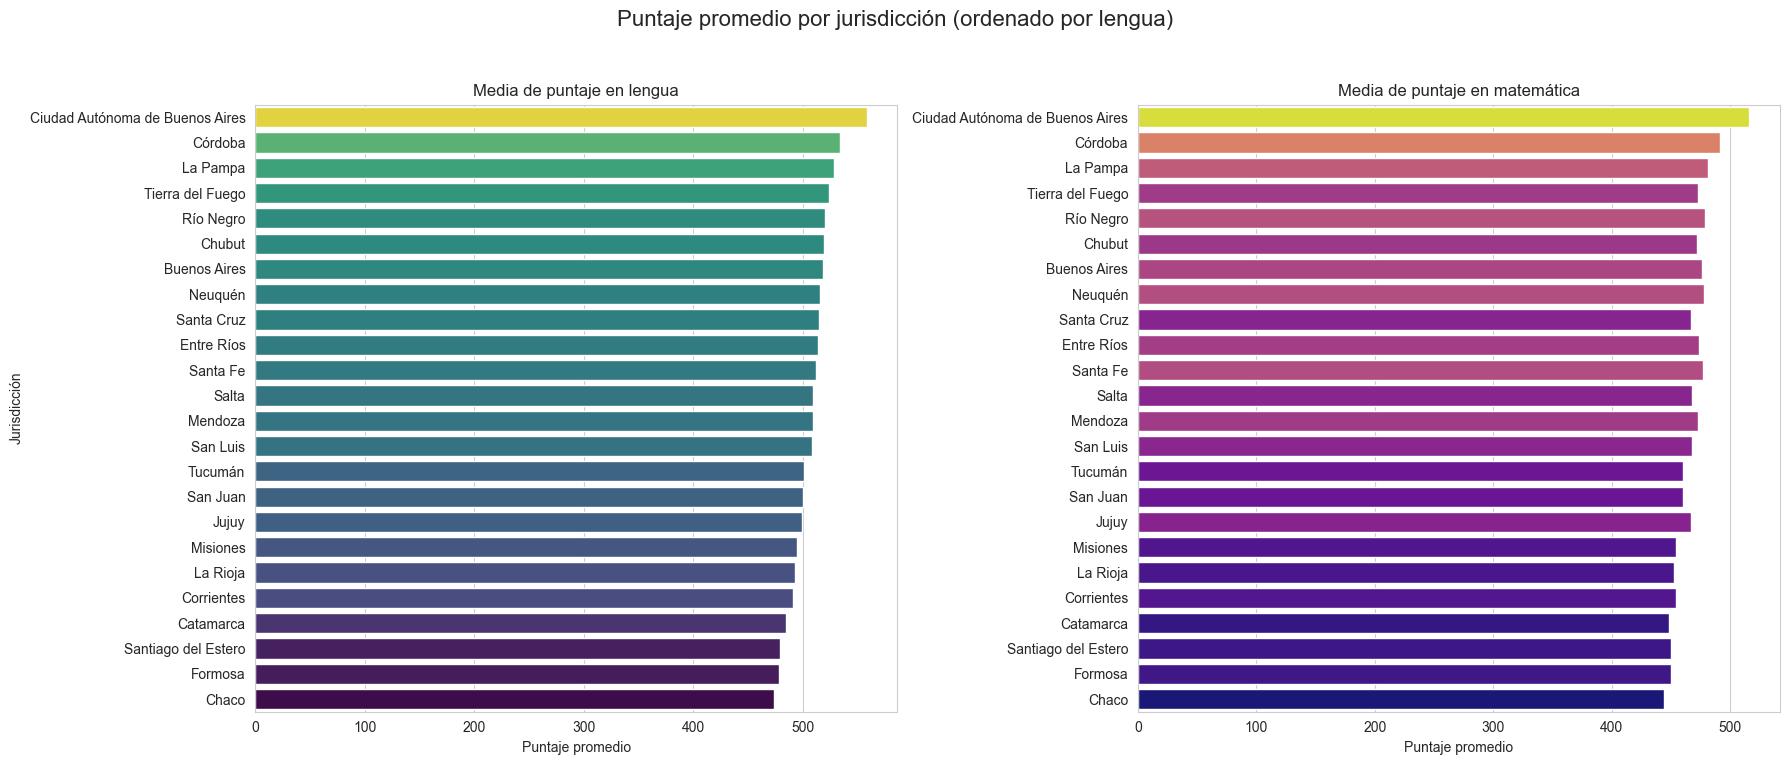

In [27]:
if 'jurisdiccion' not in df.columns:
    print("La columna 'jurisdiccion' no se encuentra.")
else:
    # Calculamos la media de puntaje por jurisdiccion
    df_media_jurisdiccion = df.groupby('jurisdiccion')[['lpuntaje', 'mpuntaje']].mean().reset_index()

    # Ordenamos las jurisdicciones por el puntaje promedio de lengua
    df_media_jurisdiccion = df_media_jurisdiccion.sort_values(by='lpuntaje', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle('Puntaje promedio por jurisdicción (ordenado por lengua)', fontsize=16)

    # Grafico de lengua
    sns.barplot(x='lpuntaje', y='jurisdiccion', data=df_media_jurisdiccion, ax=axes[0], palette="viridis", hue='lpuntaje', legend=False)
    axes[0].set_title('Media de puntaje en lengua')
    axes[0].set_xlabel('Puntaje promedio')
    axes[0].set_ylabel('Jurisdicción')

    # Grafico de matemática (mpuntaje)
    sns.barplot(x='mpuntaje', y='jurisdiccion', data=df_media_jurisdiccion, ax=axes[1], palette="plasma", hue='mpuntaje', legend=False)
    axes[1].set_title('Media de puntaje en matemática')
    axes[1].set_xlabel('Puntaje promedio')
    axes[1].set_ylabel('') 

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

--- Distribución Porcentual de Desempeño en Lengua por Nivel Socio Económico ---
ldesemp    Por debajo del básico  Básico  Satisfactorio  Avanzado
NSE_nivel                                                        
Bajo                       33.20   24.94          35.77      6.10
Medio                      19.95   19.33          45.11     15.61
Alto                       11.70   12.34          45.78     30.17


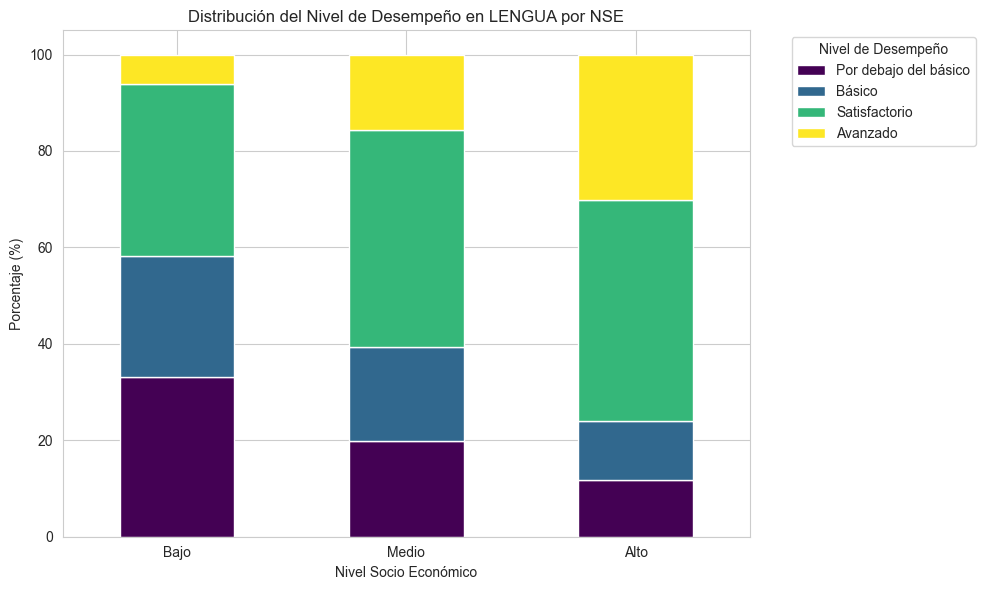

In [28]:
orden_desemp = ['Por debajo del básico', 'Básico', 'Satisfactorio', 'Avanzado']
orden_nse = ['Bajo', 'Medio', 'Alto']

# Tabla de Contingencia (Lengua vs. NSE)
# Calcular la distribución porcentual dentro de cada nivel sdocio económico 
tabla_lengua_nse = pd.crosstab(df['NSE_nivel'], df['ldesemp'], normalize='index') * 100

print("--- Distribución Porcentual de Desempeño en Lengua por Nivel Socio Económico ---")
print(tabla_lengua_nse.reindex(index=orden_nse, columns=orden_desemp).round(2))
plt.figure(figsize=(12, 6))
tabla_lengua_nse.reindex(index=orden_nse, columns=orden_desemp).plot(
    kind='bar', stacked=True, colormap='viridis', figsize=(10, 6), ax=plt.gca()
)
plt.title('Distribución del Nivel de Desempeño en LENGUA por NSE')
plt.xlabel('Nivel Socio Económico')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Nivel de Desempeño', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Distribución porcentual de desempeño en lengua por sector de gestión
ldesemp  Por debajo del básico  Básico  Satisfactorio  Avanzado
sector                                                         
Estatal                  27.55   22.25          39.83     10.37
Privado                  13.18   14.48          47.68     24.66


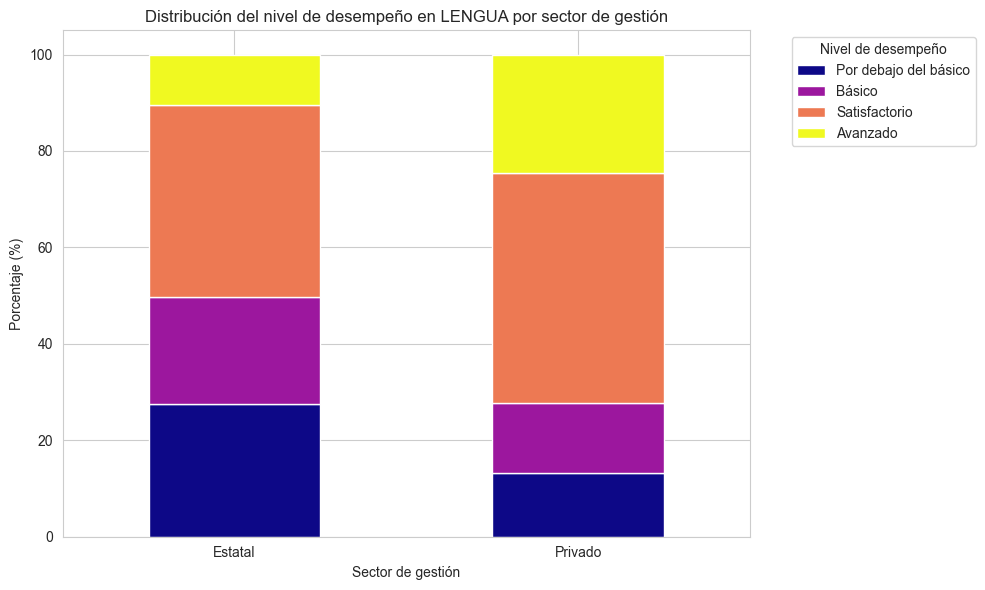

In [29]:
#  Tabla de Contingencia (Lengua vs. Sector)
tabla_lengua_sector = pd.crosstab(df['sector'], df['ldesemp'], normalize='index') * 100

print("\nDistribución porcentual de desempeño en lengua por sector de gestión")
print(tabla_lengua_sector.reindex(columns=orden_desemp).round(2))

plt.figure(figsize=(12, 6))
tabla_lengua_sector.reindex(columns=orden_desemp).plot(
    kind='bar', stacked=True, colormap='plasma', figsize=(10, 6), ax=plt.gca()
)
plt.title('Distribución del nivel de desempeño en LENGUA por sector de gestión')
plt.xlabel('Sector de gestión')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Nivel de desempeño', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()